In [18]:
import numpy as np
import os
from matplotlib import image
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import cv2 as cv

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Global map image

In [ ]:
img = image.imread('../data/airsim/images/global_map.png')

In [ ]:
UNREAL_PLAYER_START = np.array([-117252.054688, 264463.03125, 25148.908203])
UNREAL_GOAL = np.array([210111.421875, 111218.84375, 32213.0])

goal_meters = (UNREAL_GOAL - UNREAL_PLAYER_START)[:2] / 100.0
goal_meters

In [ ]:
# Define a path in image coordinates
start_px = np.array([669, 157])
goal_px = np.array([52, 1469])

path = np.array([[669, 157],
                 [638, 231],
                 [622, 330],
                 [650, 414],
                 [671, 506],
                 [669, 602],
                 [651, 707],
                 [635, 812],
                 [608, 901],
                 [578, 999],
                 [531, 1107],
                 [463, 1215],
                 [387, 1249],
                 [287, 1277],
                 [186, 1310],
                 [120, 1356],
                 [79, 1420],
                 [52, 1469]])

# Plot image with plotly
# Resize image to (m,n,3)
fig = px.imshow(img[:, :, :3])
fig.add_trace(go.Scatter(x=path[:,1], y=path[:,0], mode='lines', name='path'))
fig.update_layout(width=1600, height=800)
fig.show()

In [ ]:
# Convert path to meters
path_meters = path.copy()
# Convert to float array
path_meters = path_meters.astype(np.float64)

scale_factor = 2.5  # 1 pixel = 2.5 meters (computed from goal_meters[0] / (start_px[1] - goal_px[1]))
# Shift so start is at 0
path_meters -= start_px
# Scale
path_meters *= scale_factor
# Swap x and y
path_meters = path_meters[:, [1, 0]]

path_meters

In [ ]:
# Export path to file
np.save('../data/airsim/global_path.npy', path_meters)

Global planner

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from terrain_nerf.global_planner import GlobalPlanner
from terrain_nerf.utils import rgb2gray

In [15]:
UNREAL_PLAYER_START = np.array([-117252.054688, 264463.03125, 25148.908203])
UNREAL_GOAL = np.array([-83250.0, 258070.0, 24860.0])

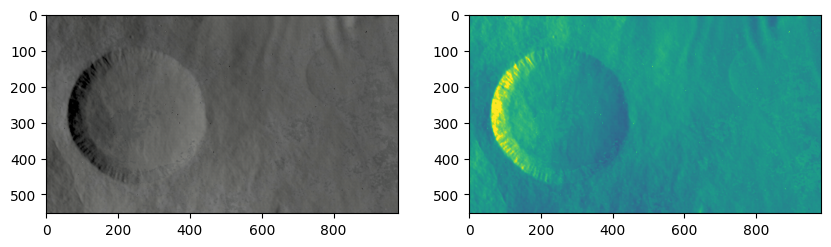

In [16]:
img = image.imread('../data/airsim/images/test_scenario.png')
img_gray = rgb2gray(img)
cost = 1.0 - img_gray

# Show image and grayscale side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
im = ax[1].imshow(cost, cmap='viridis')
plt.show()

In [17]:
fig = px.imshow(img[:, :, :3])
fig.update_layout(width=1600, height=800)
fig.show()

In [20]:
img[75,263]

array([0.2784314, 0.2784314, 0.2784314, 1.       ], dtype=float32)

In [21]:
img[263,75]

array([0.04313726, 0.04313726, 0.03921569, 1.        ], dtype=float32)

In [ ]:
# Rover image taken from start location
start_px = (271, 257)
goal_px = (170, 808)

In [ ]:
gp = GlobalPlanner(cost)

start_px = (257, 271) #np.array([115, 415])
goal_px = (395, 106) #np.array([395, 106])
path = gp.plan(start_px, goal_px)

In [ ]:
# Plot path on costmap
fig = px.imshow(cost, color_continuous_scale='viridis')
fig.add_trace(go.Scatter(x=path[:,0], y=path[:,1], mode='lines', name='path'))
fig.update_layout(width=800, height=800)
fig.show()